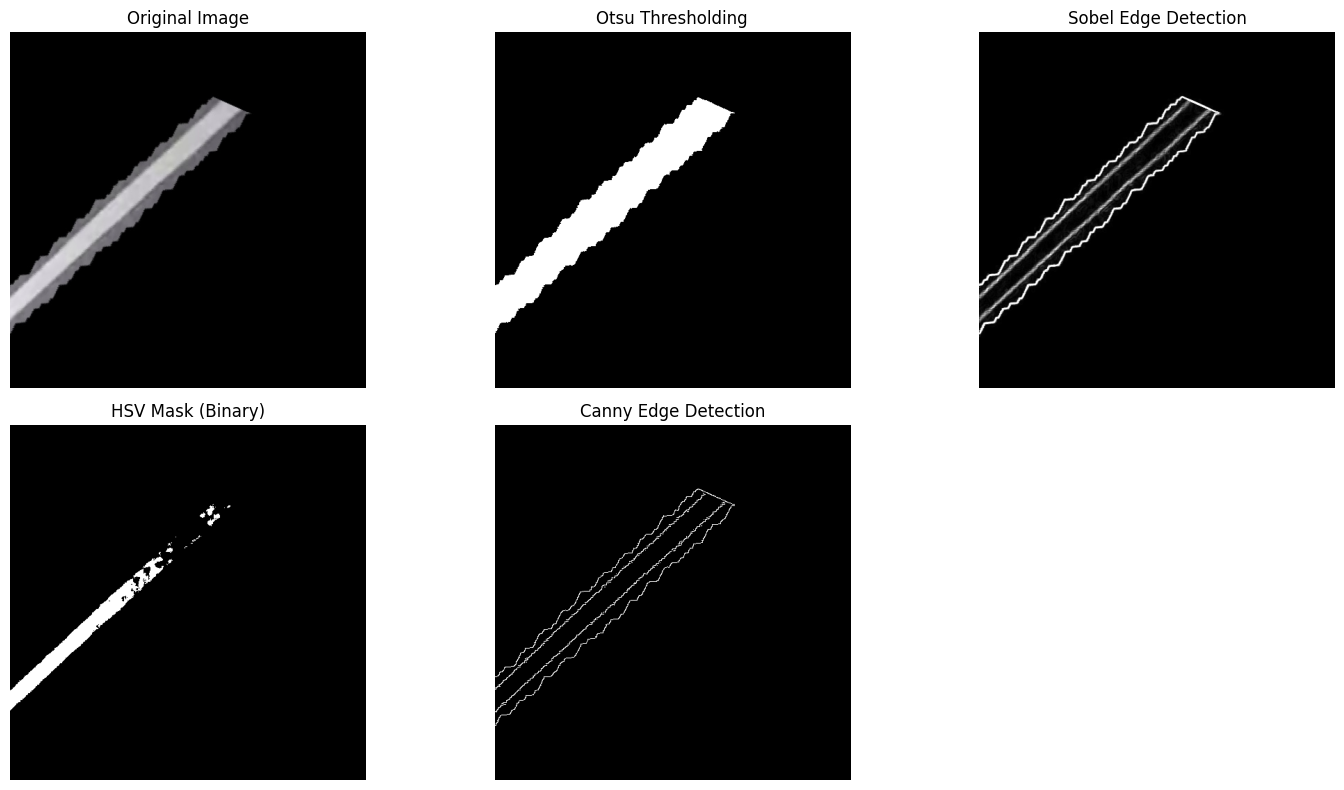

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_otsu_threshold(image):
    """Otsu 이진화를 적용하는 함수"""
    # 이미지를 그레이스케일로 변환
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Otsu의 임계값 계산 및 이진화
    _, otsu_thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return otsu_thresh

def apply_sobel_edge_detection(image):
    """Sobel 엣지 검출을 적용하는 함수"""
    # 이미지를 그레이스케일로 변환
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Sobel 필터 적용 (x축과 y축 방향)
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    # 그래디언트 크기 계산
    sobel_magnitude = cv2.magnitude(sobel_x, sobel_y)
    sobel_magnitude = cv2.convertScaleAbs(sobel_magnitude)  # uint8로 변환
    return sobel_magnitude

def apply_hsv_mask(image, lower_hsv, upper_hsv):
    """HSV 마스크를 적용하여 흰색 차선을 필터링"""
    # 이미지를 HSV 색상 공간으로 변환
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # HSV 범위에 따라 마스크 생성
    mask = cv2.inRange(hsv, lower_hsv, upper_hsv)
    return mask

def apply_canny_edge_detection(image, low_threshold, high_threshold):
    """Canny 엣지 검출을 적용하는 함수"""
    # 이미지를 그레이스케일로 변환
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Canny 알고리즘을 사용하여 엣지 검출
    edges = cv2.Canny(gray, low_threshold, high_threshold)
    return edges

def plot_results(original, otsu, sobel, hsv_mask, canny):
    """처리 결과를 시각화하는 함수"""
    plt.figure(figsize=(15, 8))
    
    plt.subplot(2, 3, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    plt.subplot(2, 3, 2)
    plt.title("Otsu Thresholding")
    plt.imshow(otsu, cmap="gray")
    plt.axis("off")

    plt.subplot(2, 3, 3)
    plt.title("Sobel Edge Detection")
    plt.imshow(sobel, cmap="gray")
    plt.axis("off")

    plt.subplot(2, 3, 4)
    plt.title("HSV Mask (Binary)")
    plt.imshow(hsv_mask, cmap="gray")
    plt.axis("off")

    plt.subplot(2, 3, 5)
    plt.title("Canny Edge Detection")
    plt.imshow(canny, cmap="gray")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    # 이미지 로드
    image_path = "./Compose_758.jpg"  # 처리할 이미지 경로
    image = cv2.imread(image_path)

    # Otsu 이진화
    otsu_thresh = apply_otsu_threshold(image)

    # Sobel 엣지 검출
    sobel_edges = apply_sobel_edge_detection(image)

    # HSV 색상 필터링 (흰색 차선)
    lower_white = np.array([0, 0, 200])  # 흰색의 최소 HSV 값
    upper_white = np.array([180, 30, 255])  # 흰색의 최대 HSV 값
    hsv_mask = apply_hsv_mask(image, lower_white, upper_white)  # 마스크 반환

    # Canny 엣지 검출
    canny_edges = apply_canny_edge_detection(image, 50, 150)

    # 처리 결과 시각화
    plot_results(image, otsu_thresh, sobel_edges, hsv_mask, canny_edges)